# Computer Vision- Finding Celebrity Look-alike

The objective of this project is to find out which celebrity looks like you the most.

To achieve this, will be using the face_recognition library, which is built using dlib’s state-of-the-art face recognition with deep learning. It is considered one of the simples libraries used for face recognition and manipulation. The model has an accuracy of 99.38% on the Labeled Faces in the Wild benchmark. With this library you can find faces, find and manipulate facial features, and identify faces in pictures.

# Import the Libraries

In [2]:
import face_recognition
import os
import numpy as np
from IPython.display import Image

# Create Function to Load Images and Face Encodings

###### Face Embeddings
FaceNet is a deep neural network used for extracting features from an image of a person's face. FaceNet takes that image of the person's face as an input, and it gives vector of 128 numbers as an output. This output represent the most important features of that person's face. In machine learning, this vector is called embedding. The face_recognition library used in this project uses FaceNet to find out the face embeddings.

In [3]:
def load_images(known_images_dir):
    known_encodings = []
    known_images = []

    for file in os.listdir(known_images_dir):
        #fsdecode function decode the file into filename
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))

        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)

    return (known_encodings, known_images)

# Calculating Euclidean Distance

###### The function compares a list of face encodings to a known face encoding and get a Euclidean distance for each comparison face. The distance tells how similar the faces are.

In [4]:
def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

# Load the Image

In [5]:
# Loading the celebrity images
known_encodings, known_images = load_images("/kavyapan/projects/lookalikeceleb/images")

/usr/local/anaconda/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
# Loading self image
original_image = "../lookalikeceleb/myimage.jpg"
#Image(filename=original_image)

# Find the Matching Celebrity Image

In [7]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]

Hey, you look like Teresa Wright!


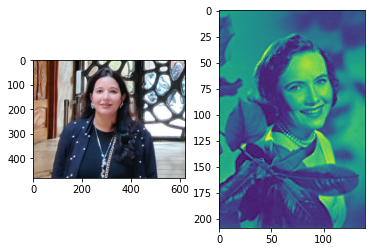

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# read images
img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('/kavyapan/projects/lookalikeceleb/images/' + matching_image)

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);

print('Hey, you look like ' + os.path.splitext(matching_image)[0] + '!')